In [1]:
import numpy as np
import root_numpy as rnp
import uproot3
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


In [2]:
import os

In [3]:
findhits = '../test_50files/Run_15000_to_15500_findhits.root'
vertexed = '../test_50files/Run_15000_to_15500_vertexed.root'
test_file = '../min2analyzer_nlayers_chance/test_saving_fit_hits.root'

In [4]:
fhits = uproot3.open(findhits)
tree_fhits = fhits['T']
ghits = np.vstack([tree_fhits.array('globalhits')['globalhit{}'.format(gh)] for gh in range(8)]).transpose()

In [5]:
ftest = uproot3.open(test_file)
tree_test = ftest['T']

In [6]:
z0= 377.2
z1= 260.5
z2= 78.1
z3= 11.8
z4= 373.5
z5= 256.5
z6 = 74.1
z7 = 7.8
zs = [z0, z1, z2, z3, z4, z5, z6, z7]

In [7]:
fitparamsx = [rnp.root2array(test_file, treename='T', branches='xtrackpar{}'.format(i)) for i in [0,1]]
fitparamsx = np.vstack(fitparamsx).transpose()
fitparamsy = [rnp.root2array(test_file, treename='T', branches='ytrackpar{}'.format(i)) for i in [0,1]]
fitparamsy = np.vstack(fitparamsy).transpose()

In [8]:
evt_id = rnp.root2array(test_file, treename='T', branches='evt_id')

In [9]:
scatteranglex = rnp.root2array(test_file, treename='T', branches='scatteranglex')
scatterangley = rnp.root2array(test_file, treename='T', branches='scatterangley')

In [10]:
pt = lambda x: - x[0]/x[1]

In [11]:
pt(fitparamsx[0])

155.71950408255935

In [12]:
pt(fitparamsy[0])

118.29588862689646

In [13]:
evt_id[0]

4309.0

In [14]:
ghits[4309]

array([109.30625,  83.15   , 122.975  , 108.29375, 180.59375, 153.25625,
       160.68125, 142.11875])

In [15]:
xx = np.arange(0,200)

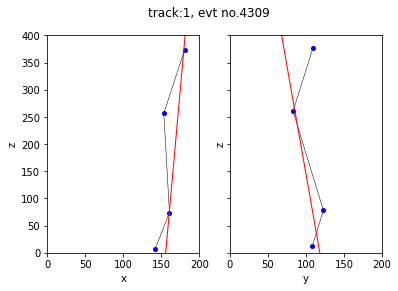

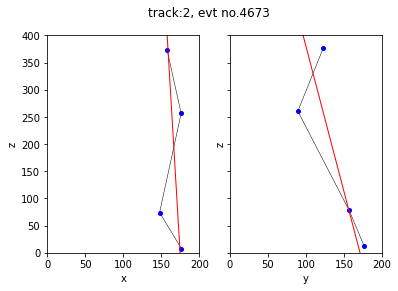

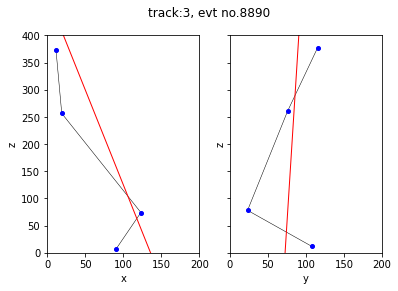

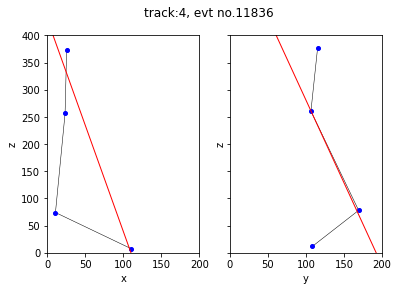

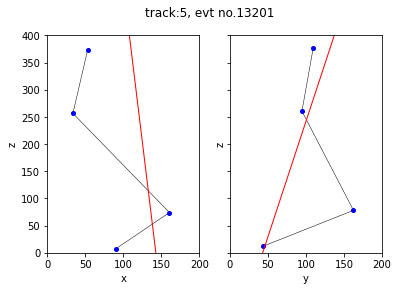

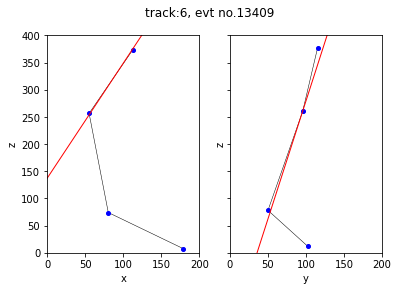

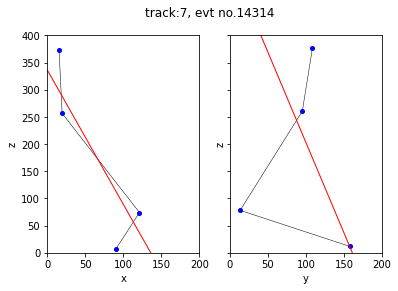

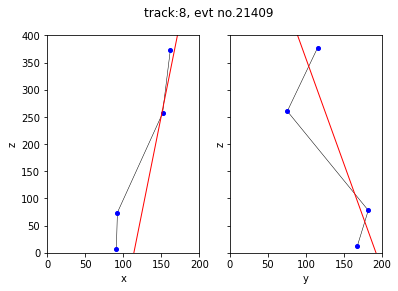

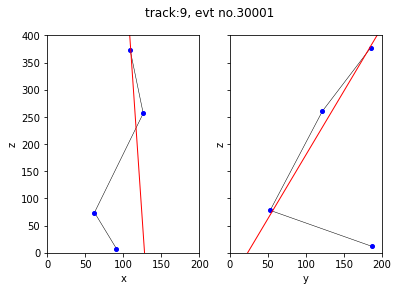

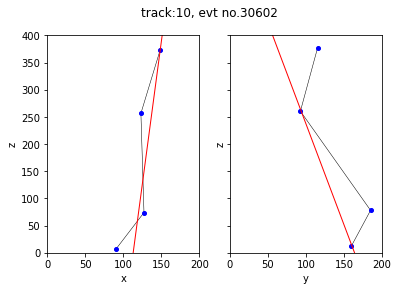

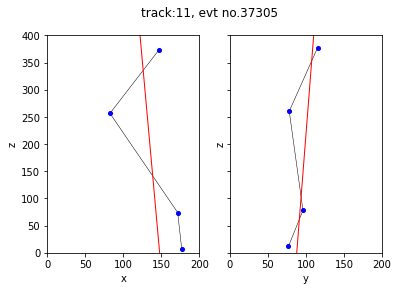

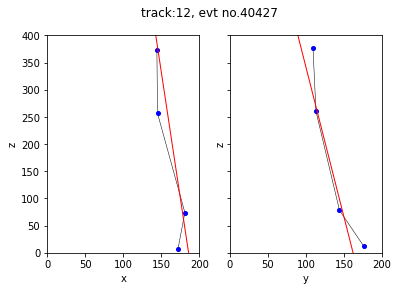

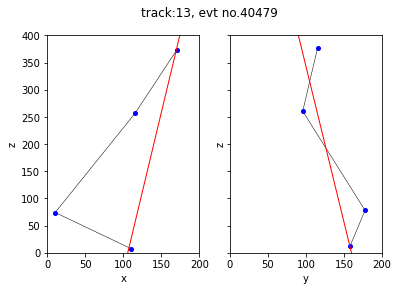

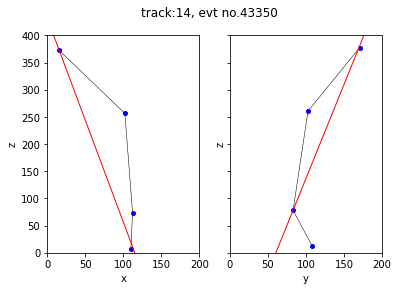

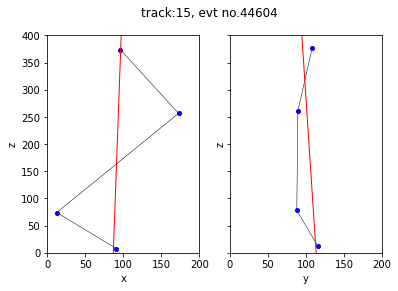

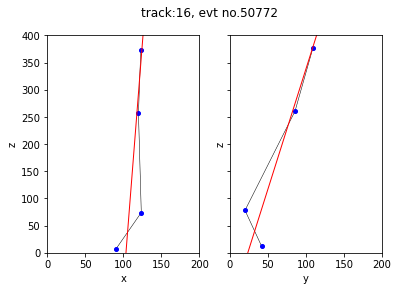

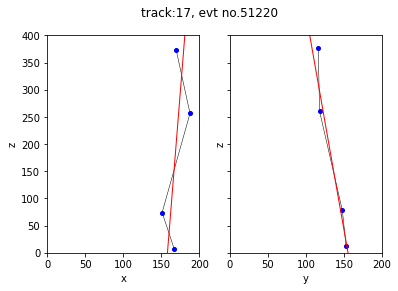

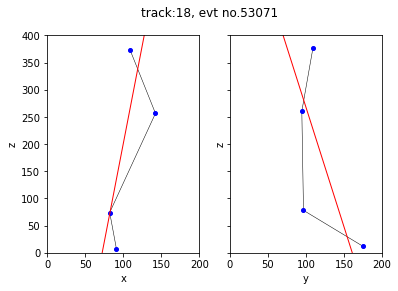

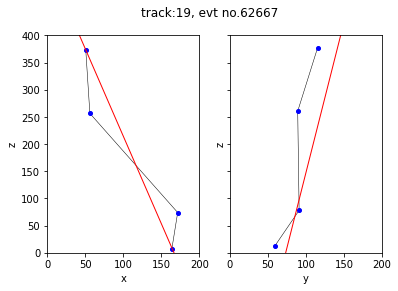

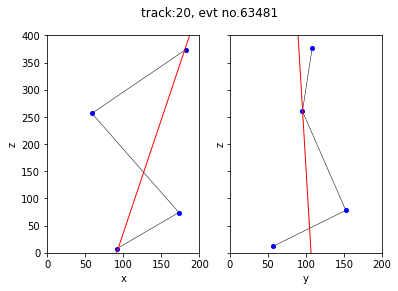

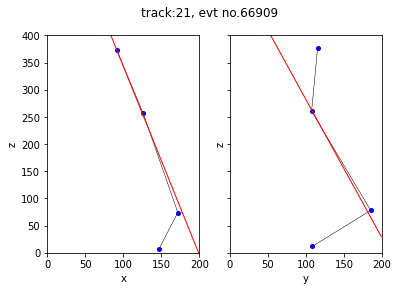

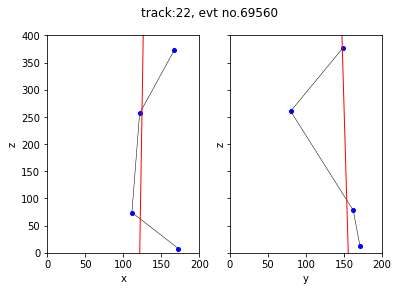

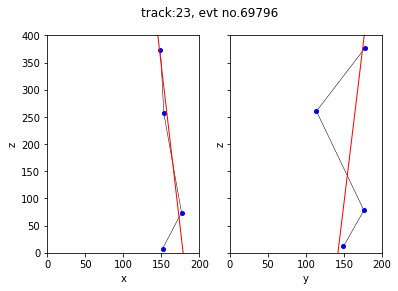

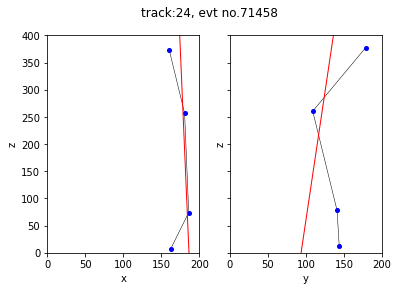

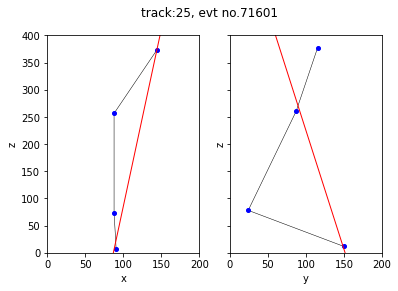

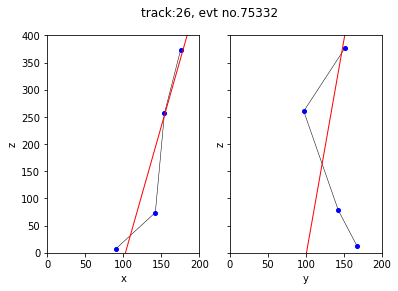

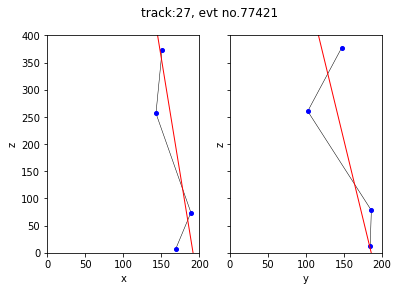

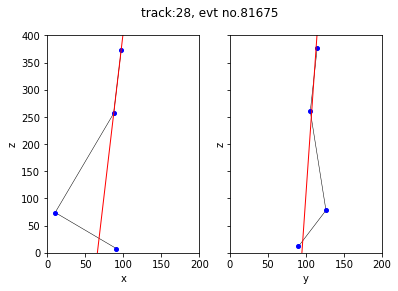

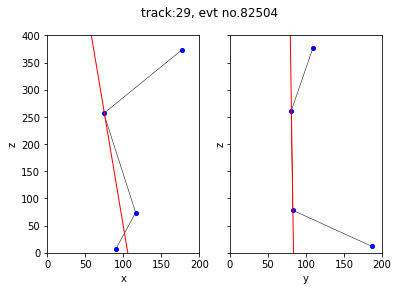

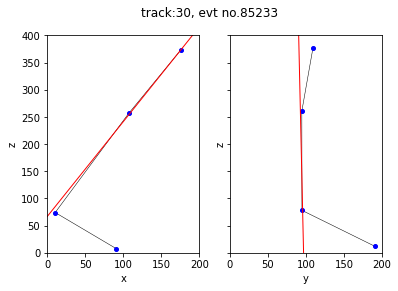

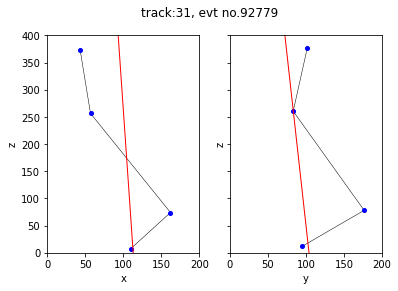

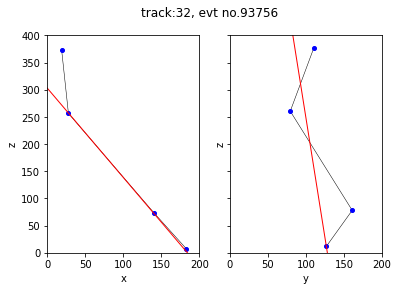

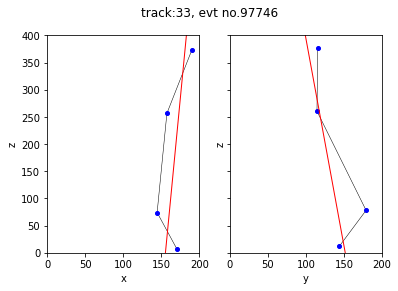

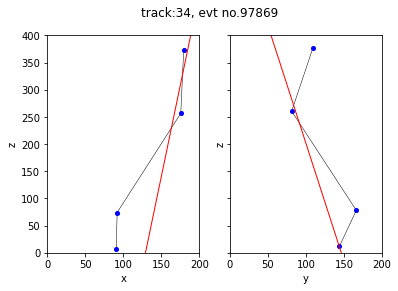

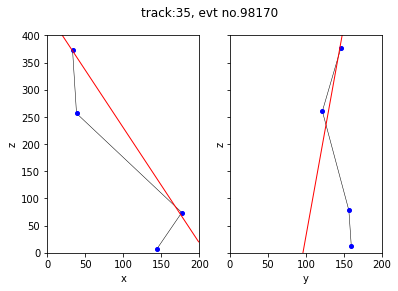

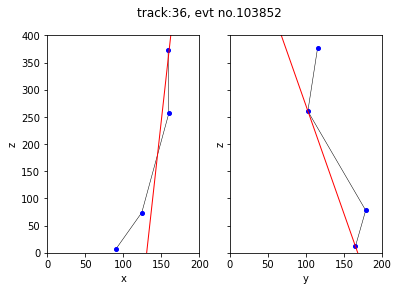

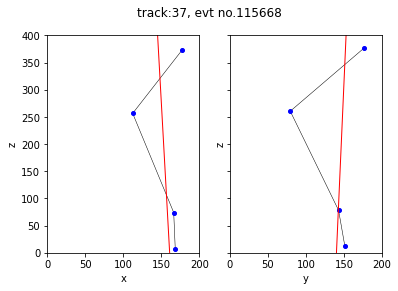

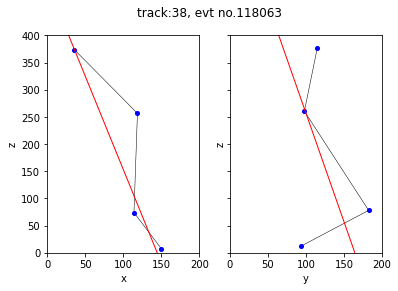

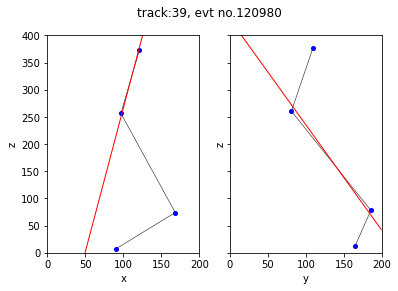

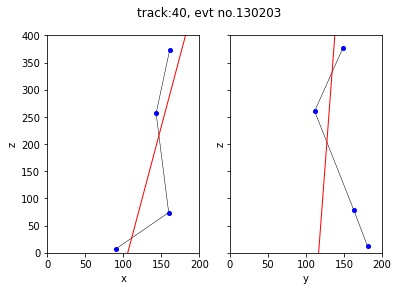

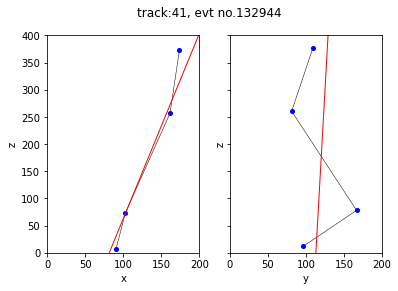

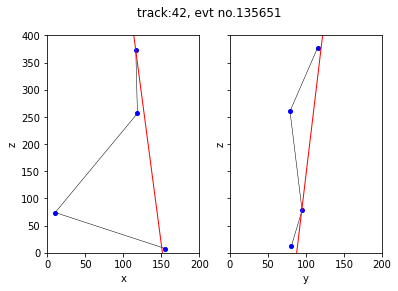

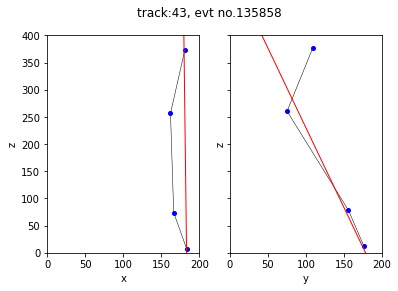

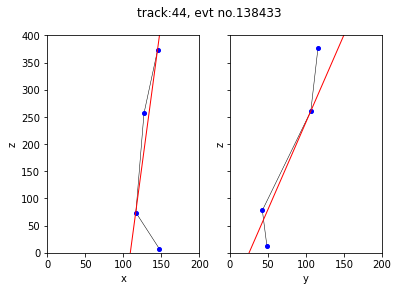

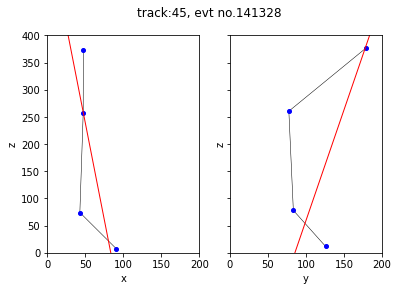

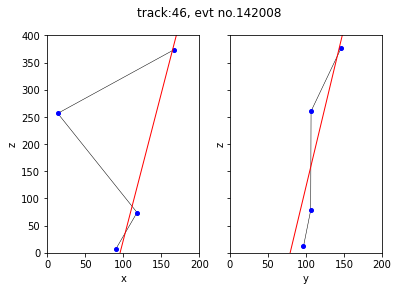

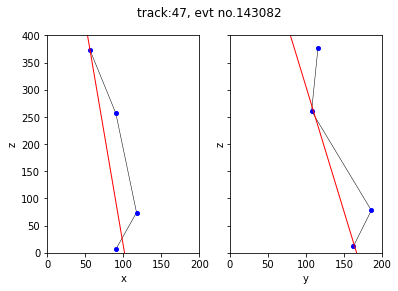

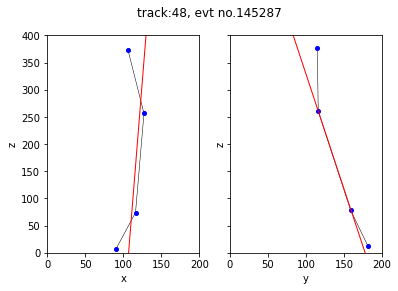

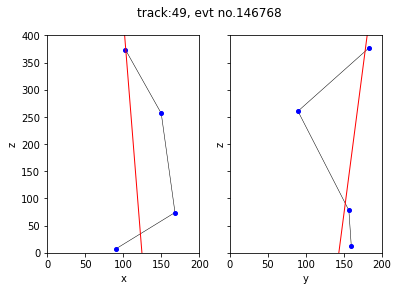

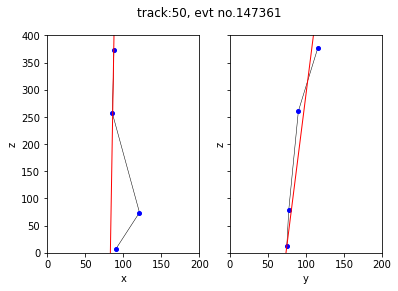

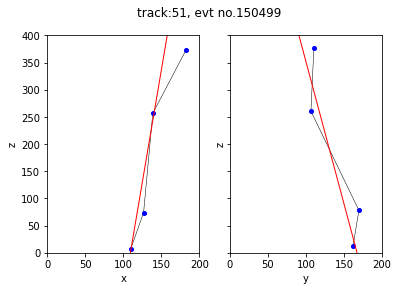

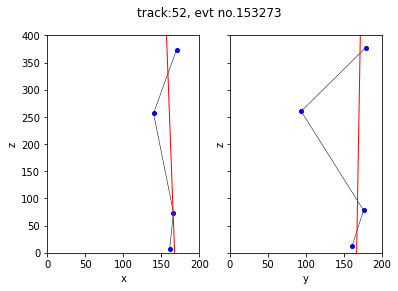

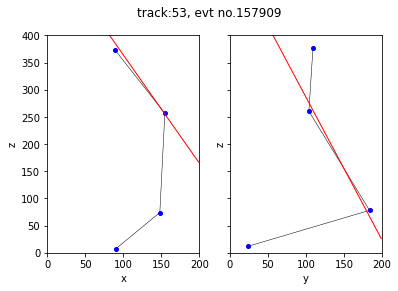

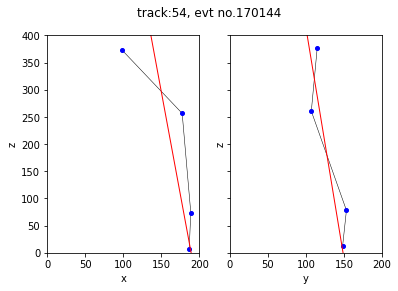

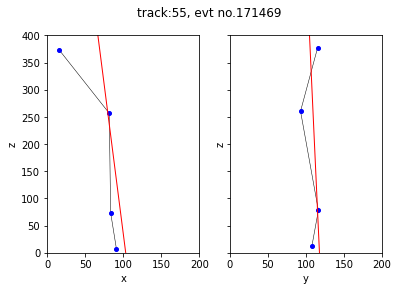

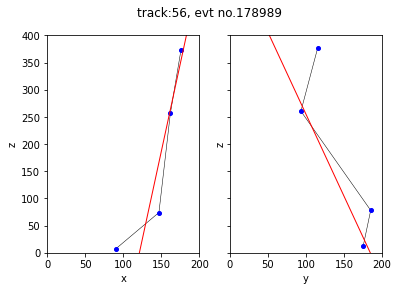

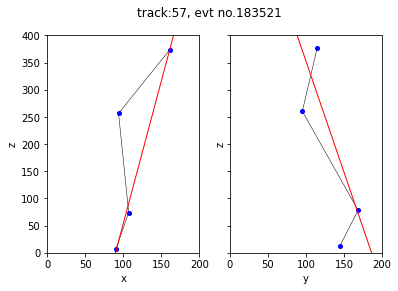

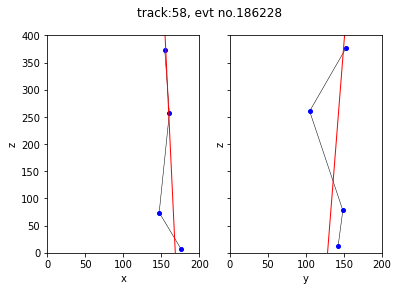

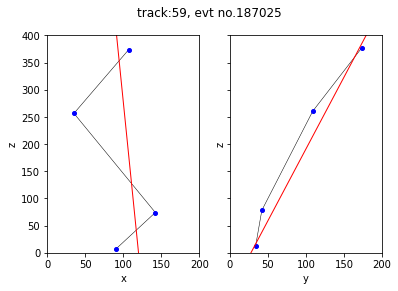

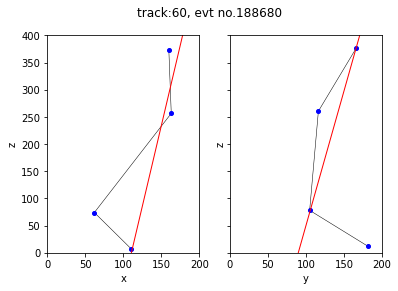

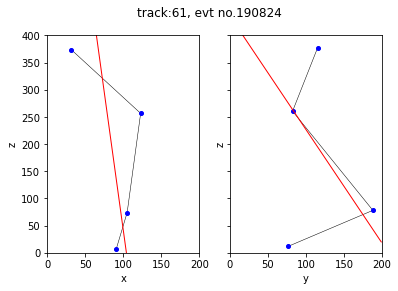

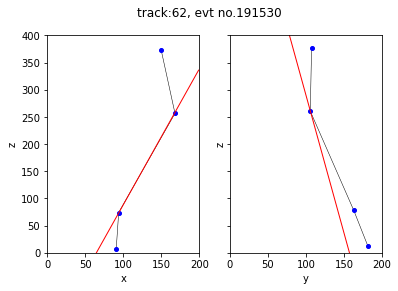

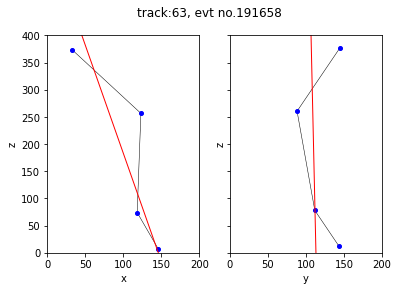

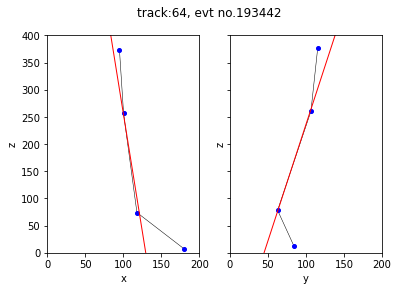

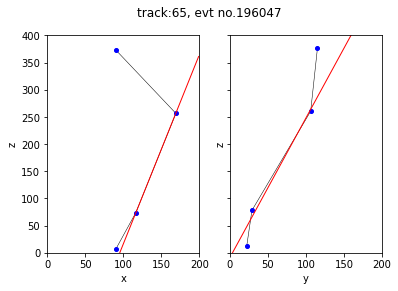

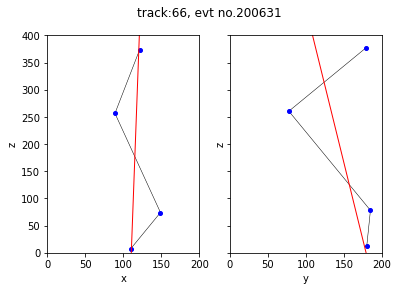

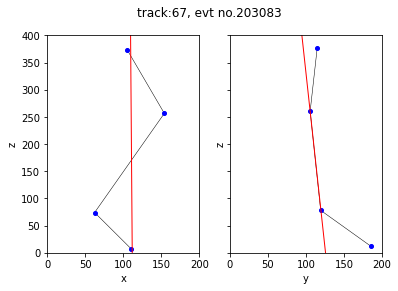

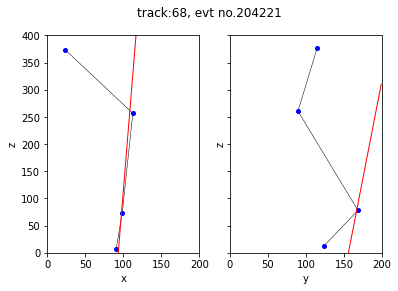

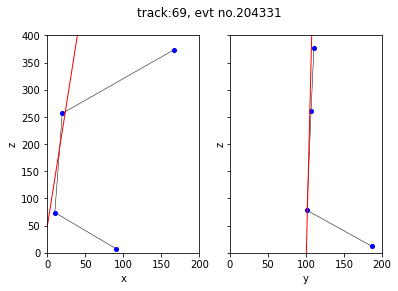

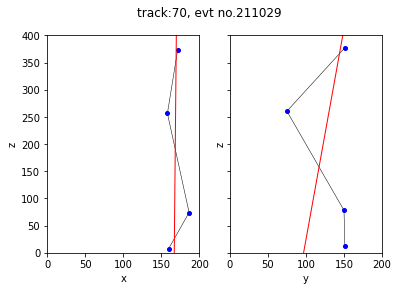

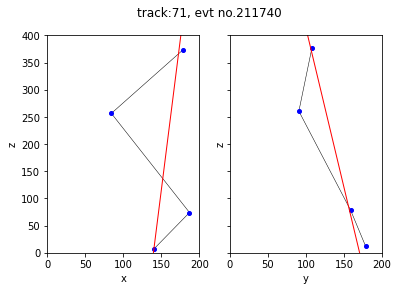

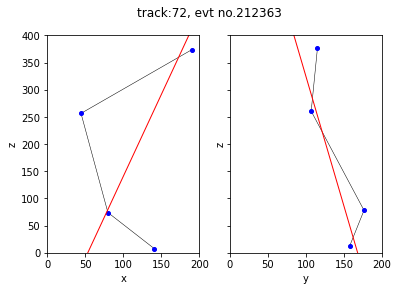

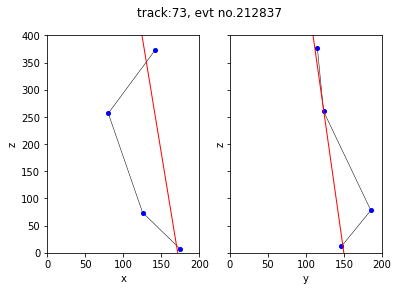

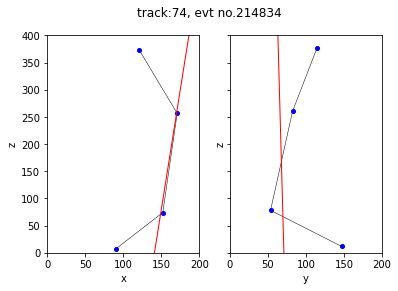

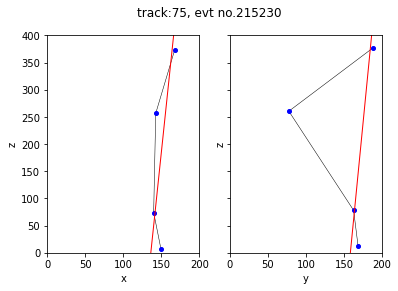

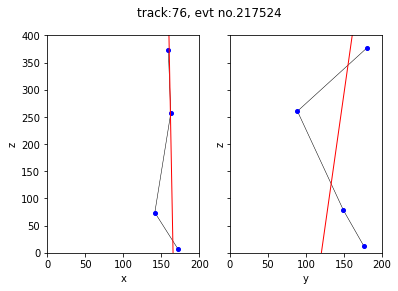

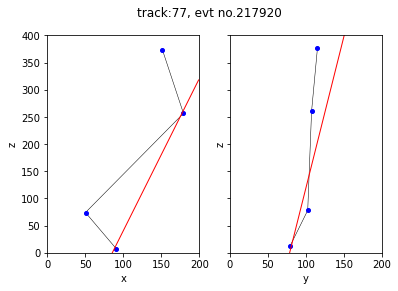

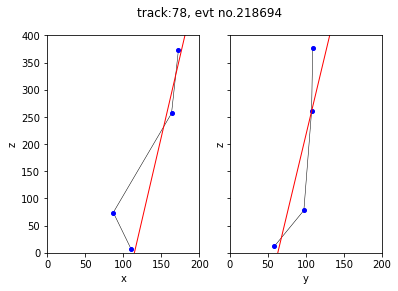

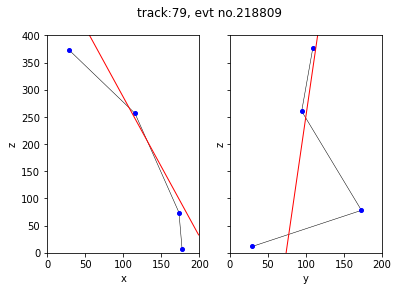

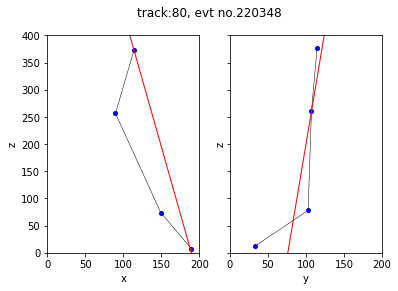

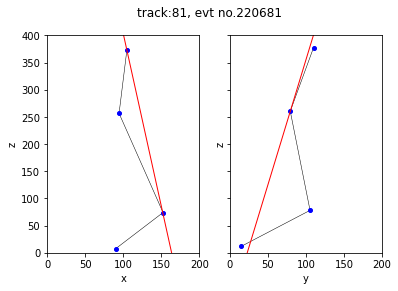

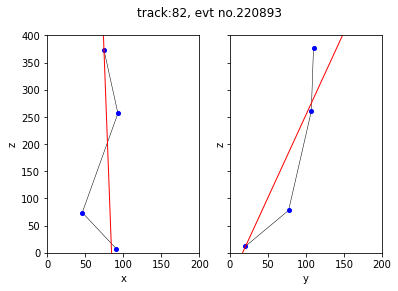

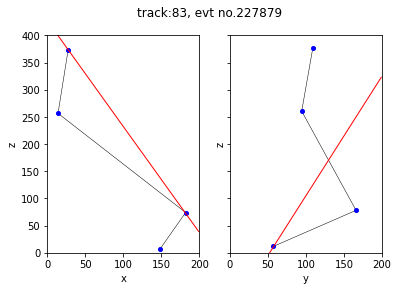

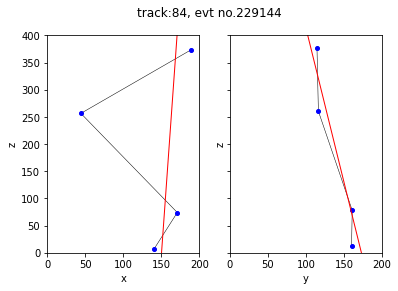

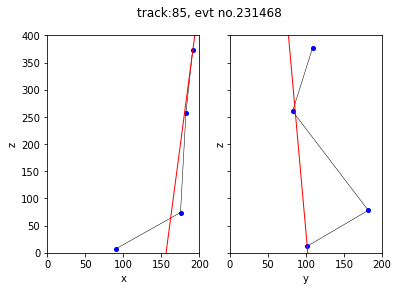

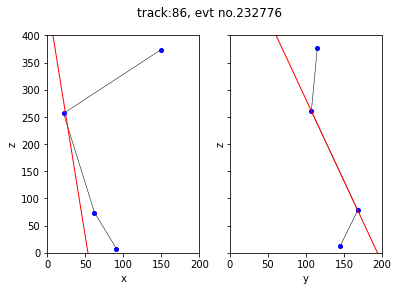

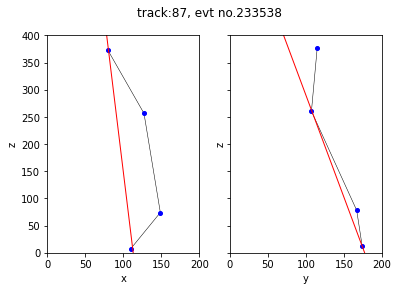

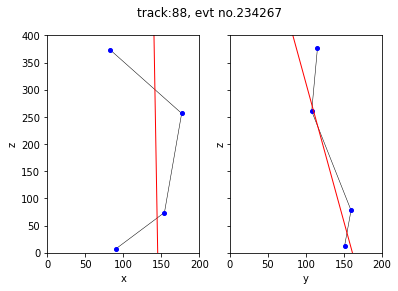

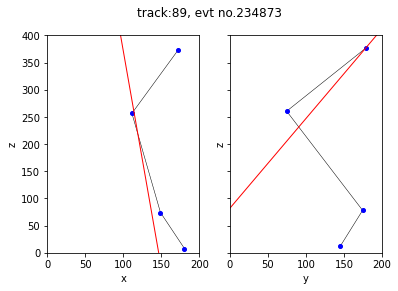

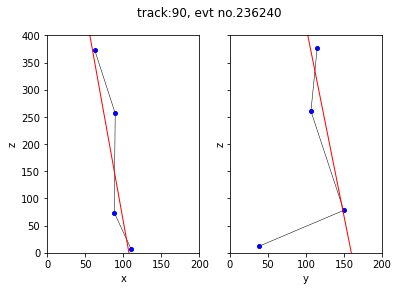

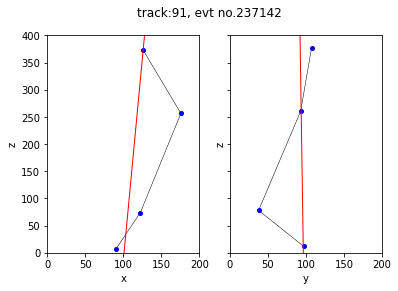

In [16]:
for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(1,2, sharey=True)
    plt.suptitle('track:{}, evt no.{}'.format(j+1, int(evt)))
    ax[1].plot(ghits[int(evt)][:4], zs[:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].plot(ghits[int(evt)][4:], zs[4:], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].plot(fitparamsx[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsx[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1].plot(fitparamsy[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsy[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[0].set_xlabel('x')
    ax[1].set_xlabel('y')
    for i in [0,1]:
        ax[i].set_xlim(0,200)
        ax[i].set_ylim(0,400)
        ax[i].set_ylabel('z')
    plt.show()

In [17]:
hits_from_test = np.vstack([rnp.root2array(test_file, treename='T', 
                                           branches='hitpositions.globalhits{}'.format(gh)) for gh in range(8)]).transpose()

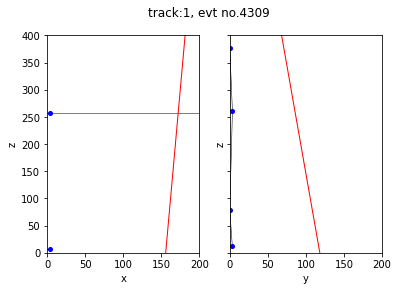

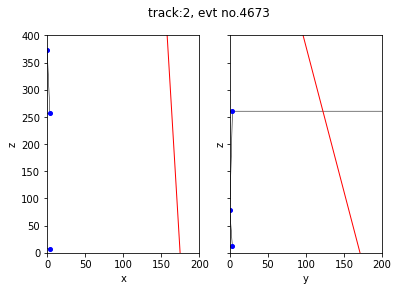

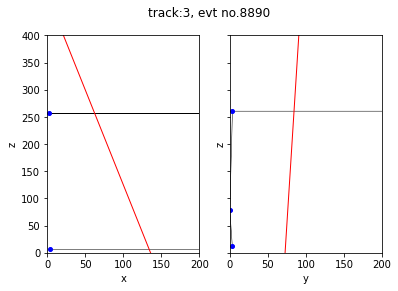

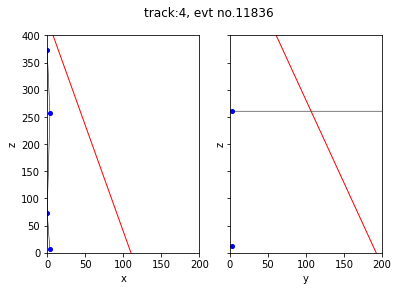

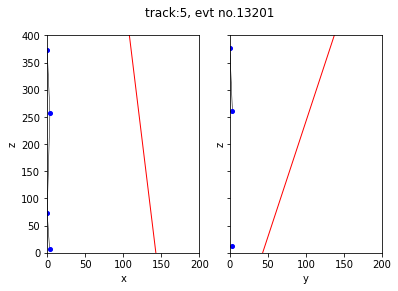

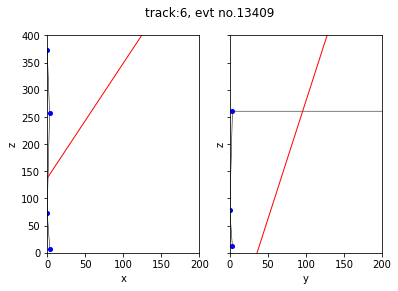

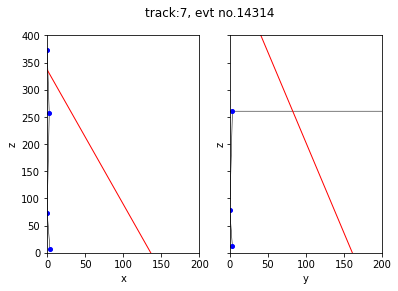

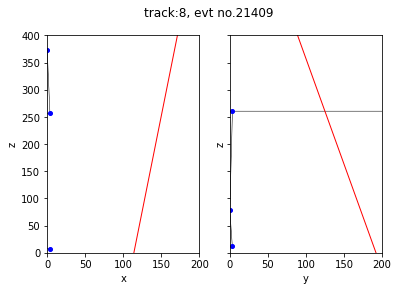

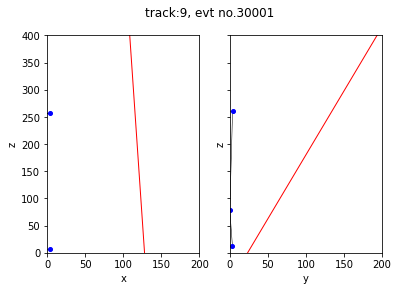

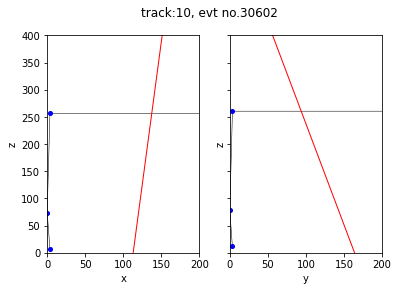

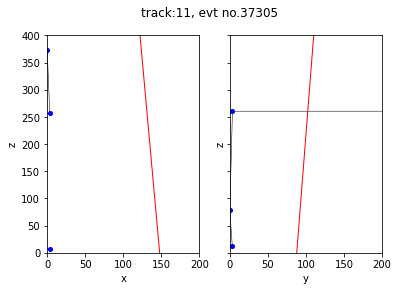

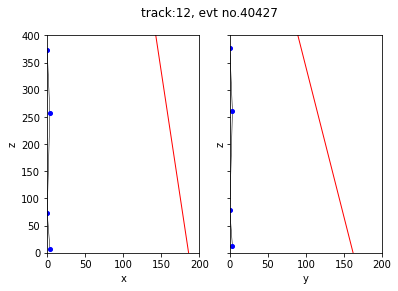

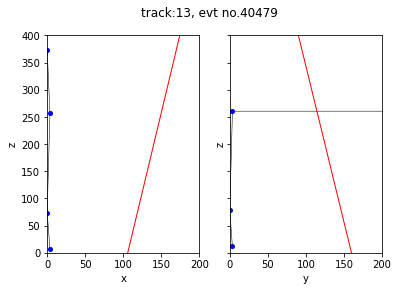

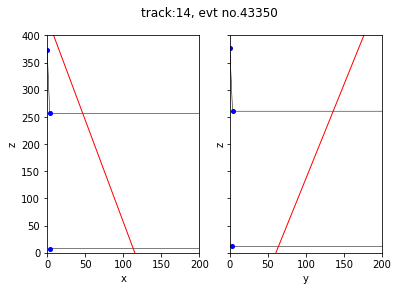

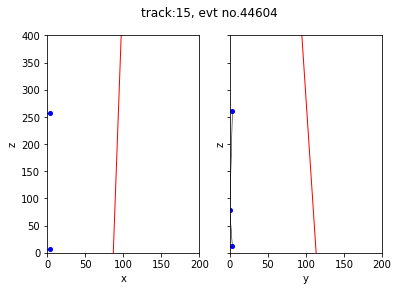

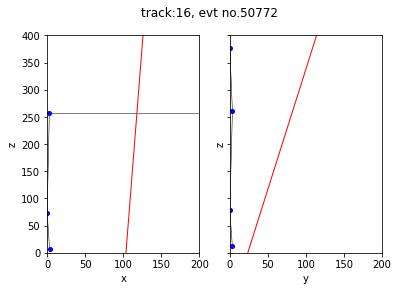

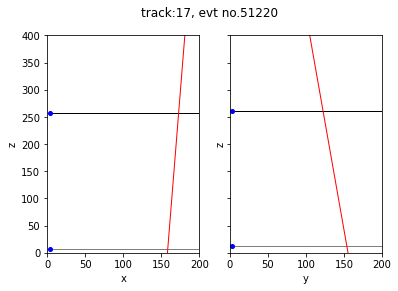

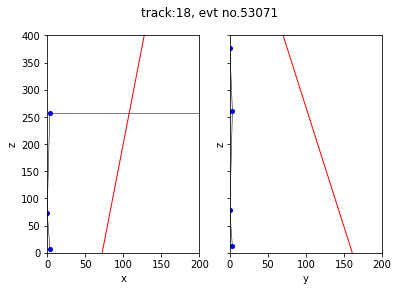

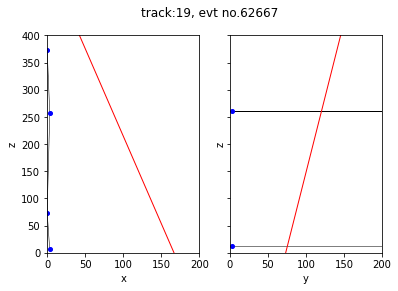

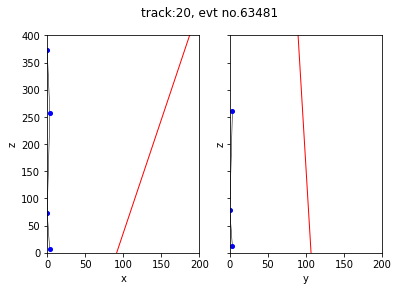

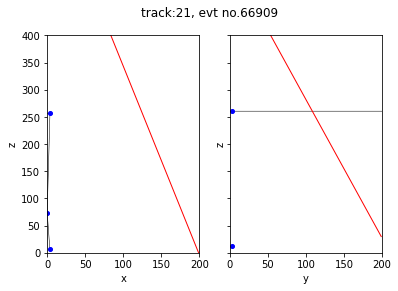

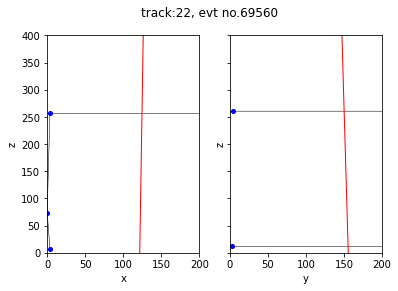

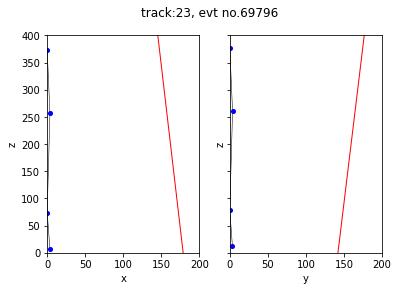

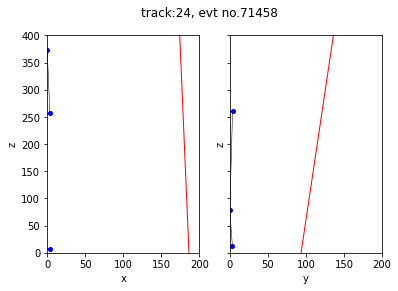

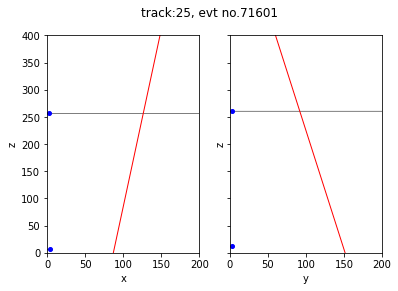

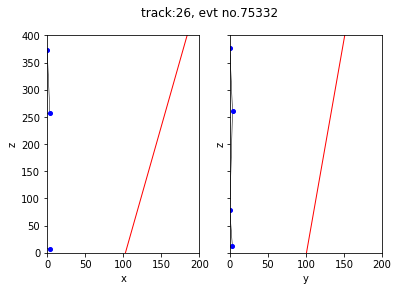

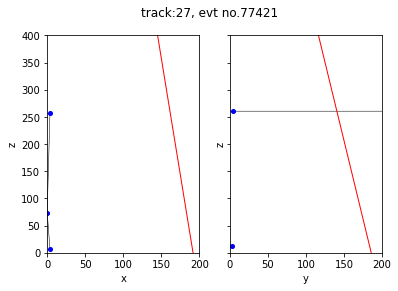

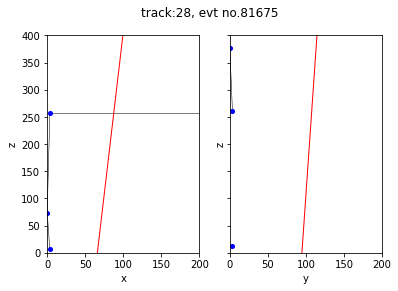

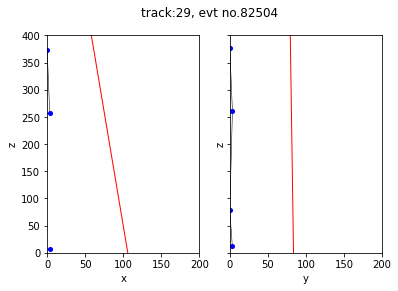

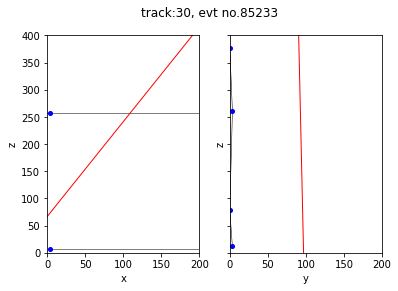

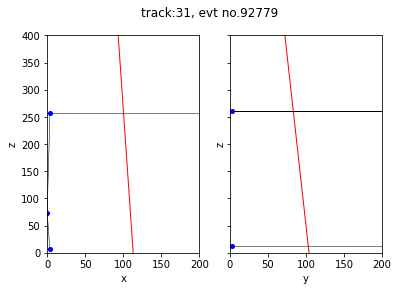

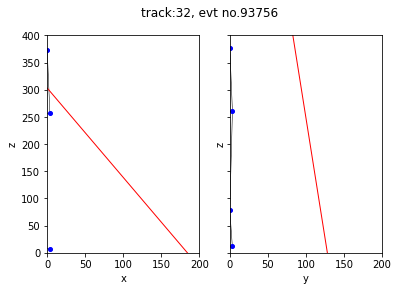

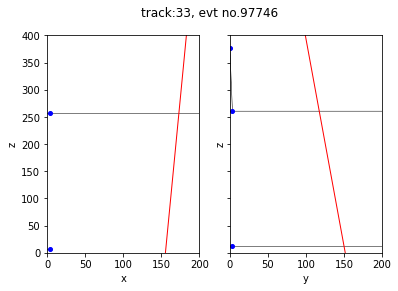

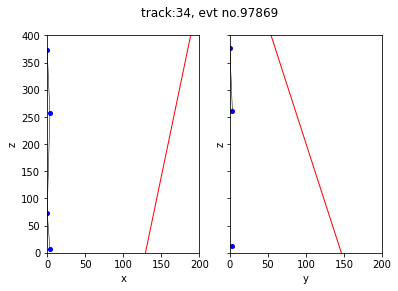

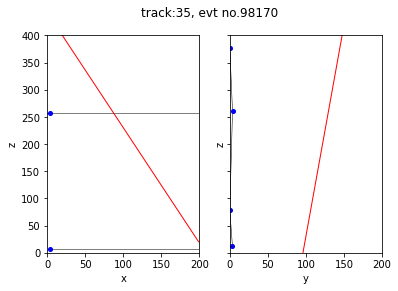

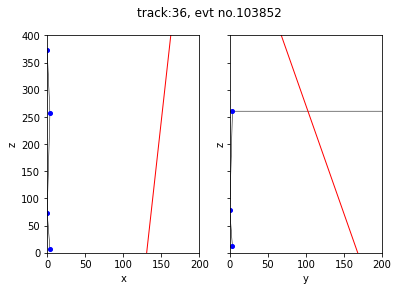

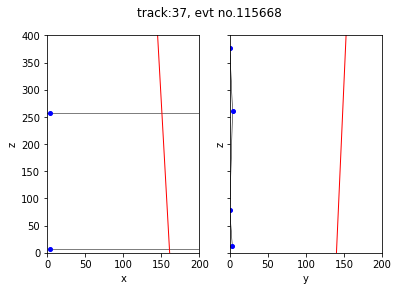

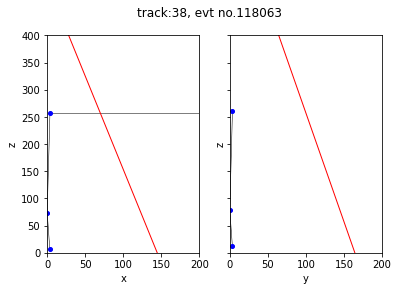

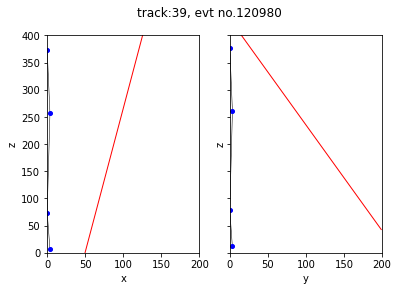

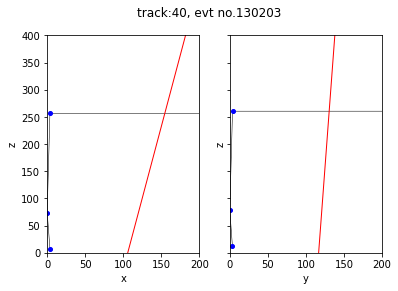

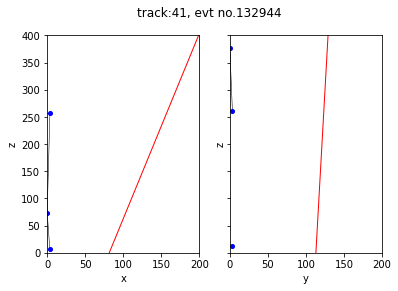

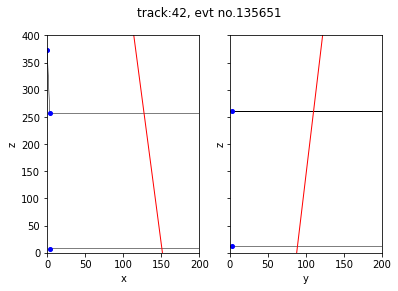

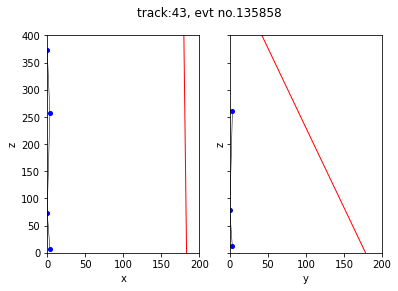

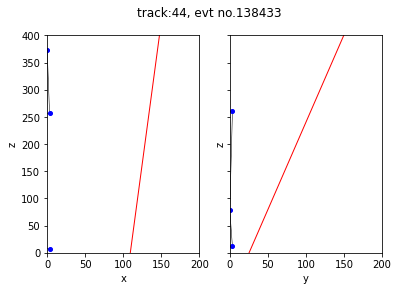

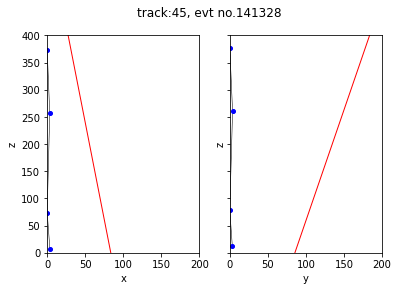

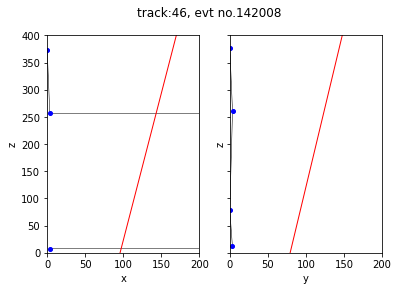

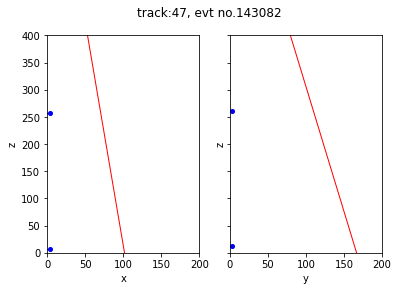

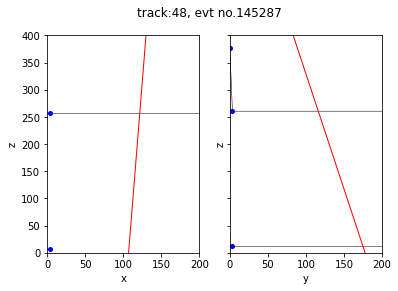

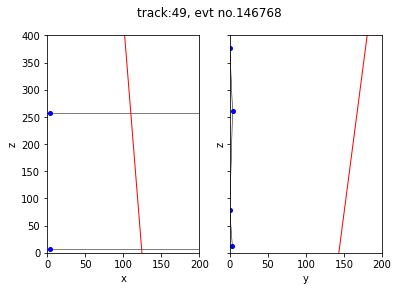

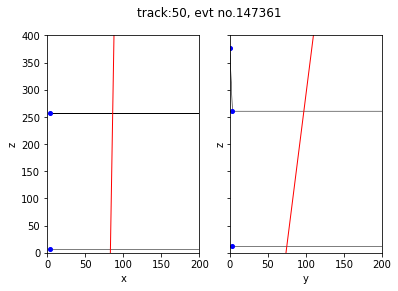

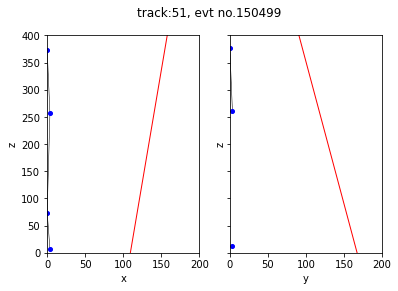

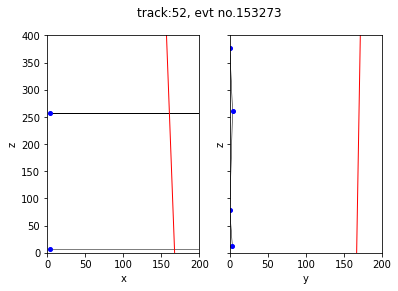

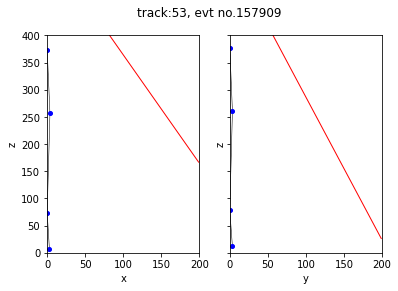

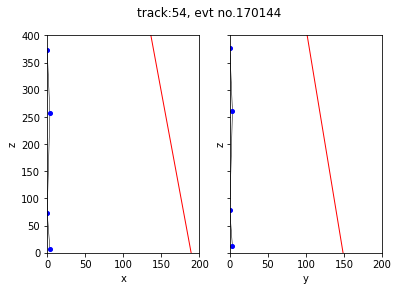

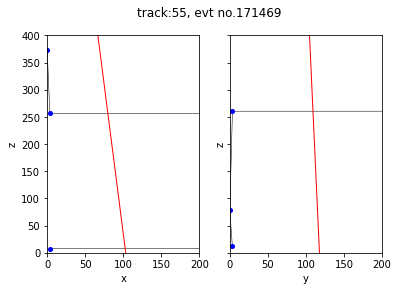

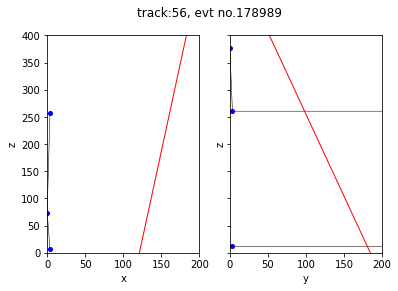

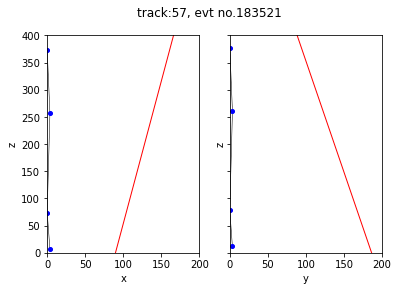

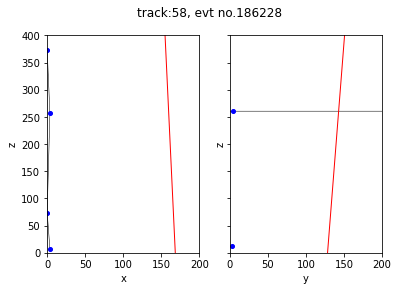

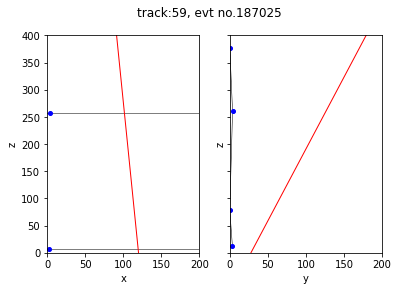

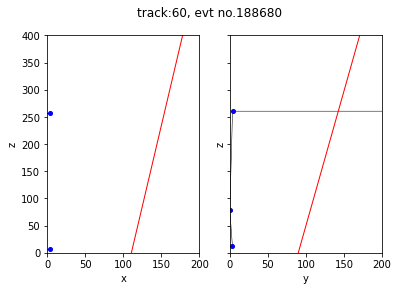

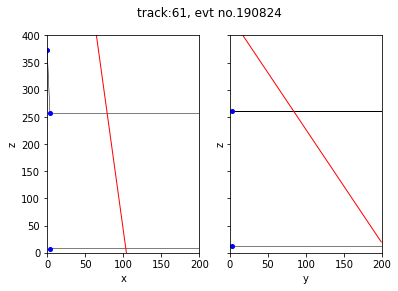

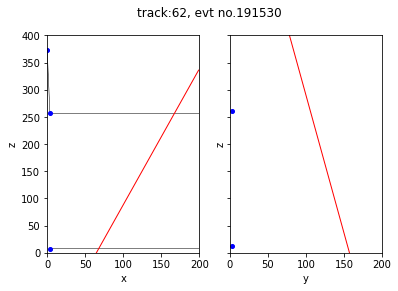

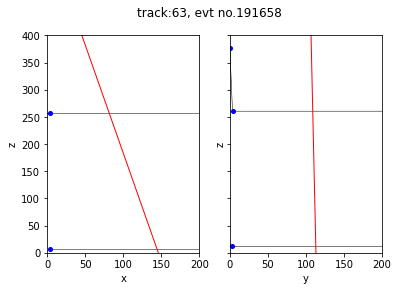

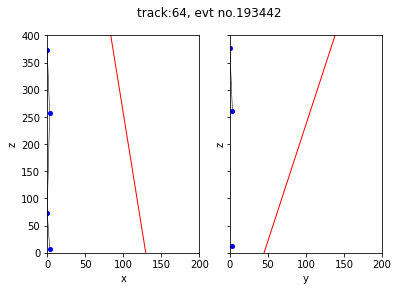

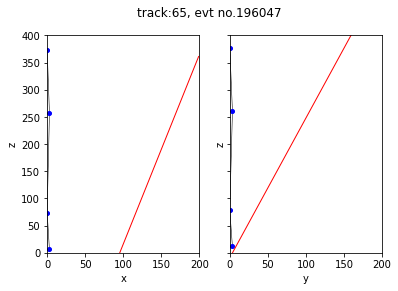

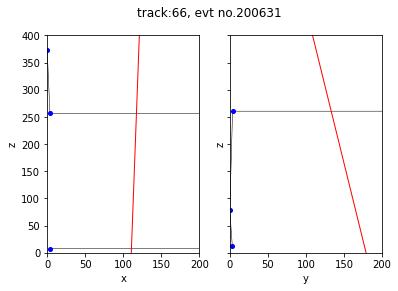

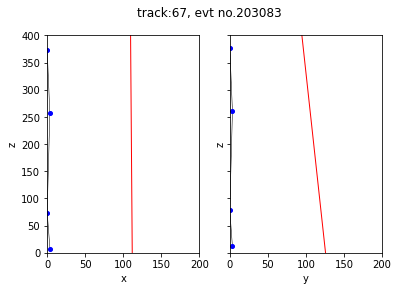

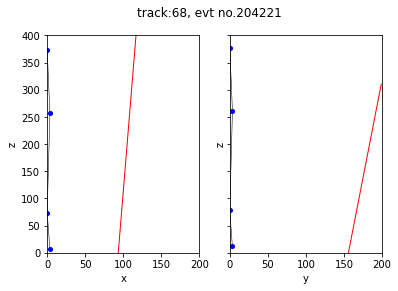

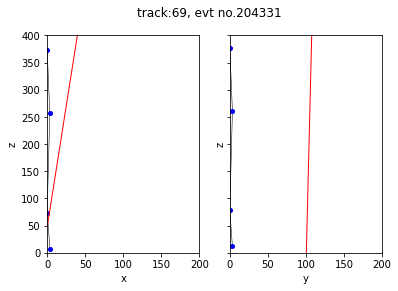

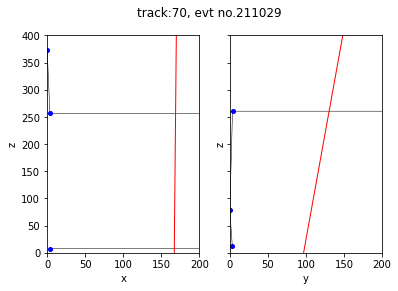

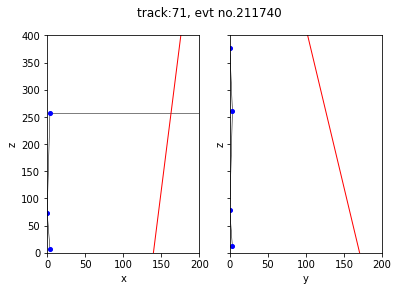

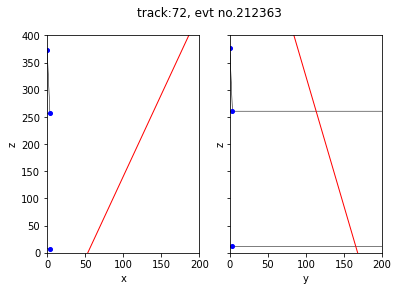

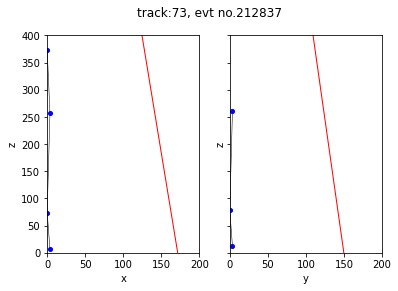

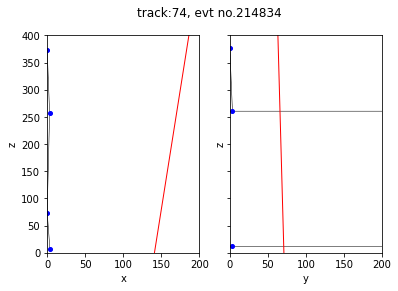

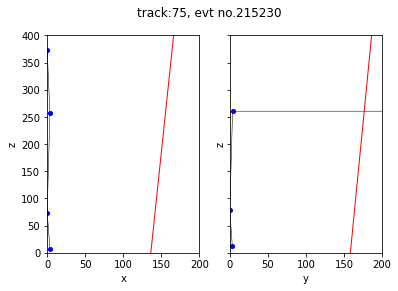

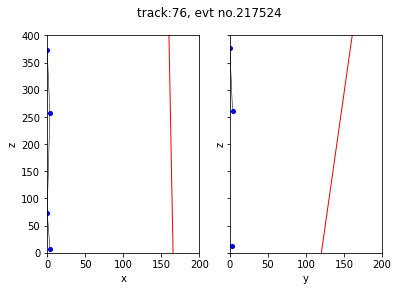

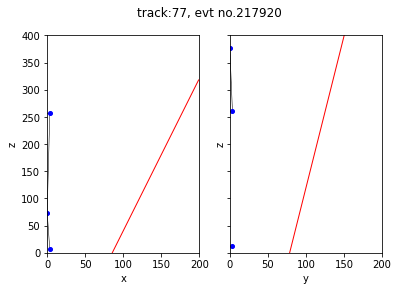

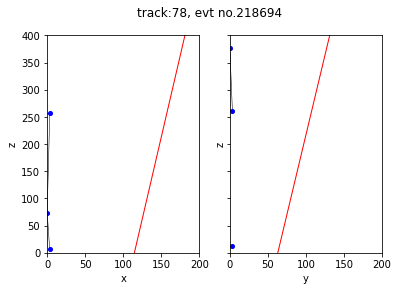

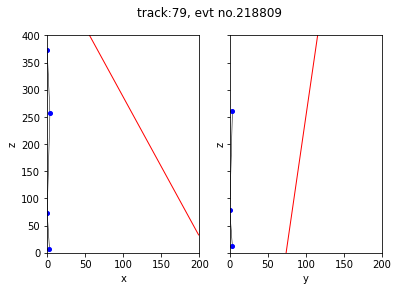

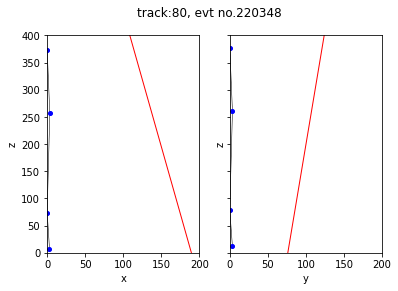

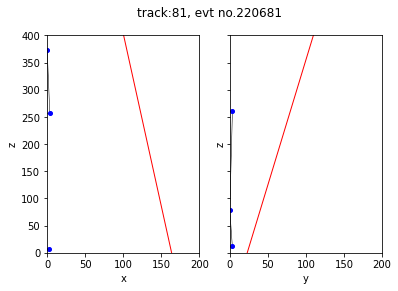

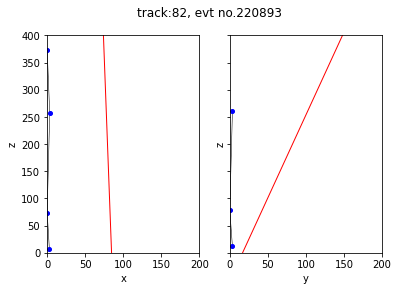

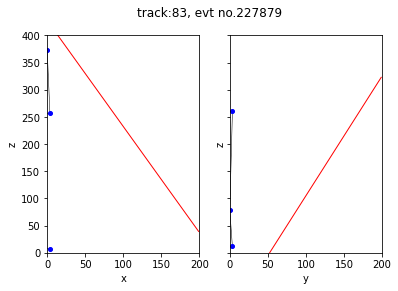

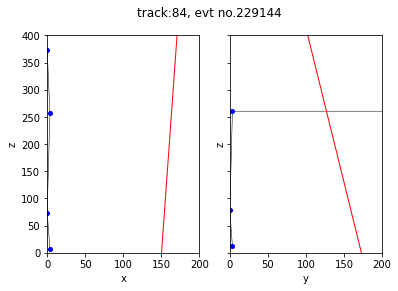

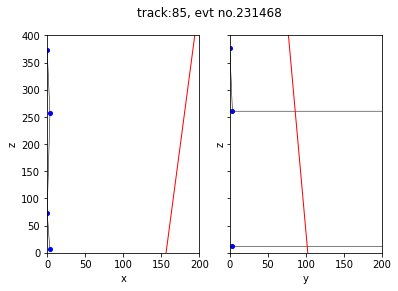

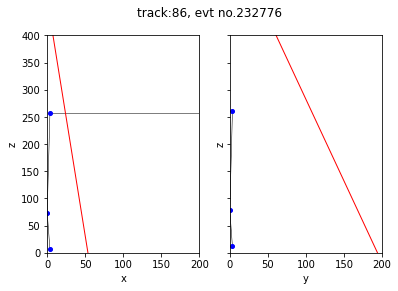

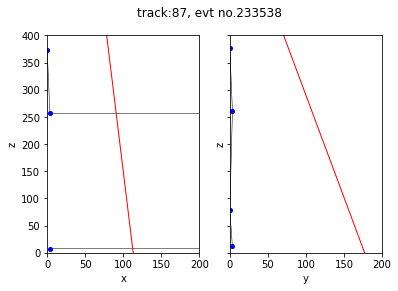

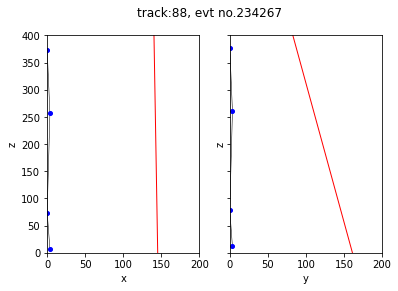

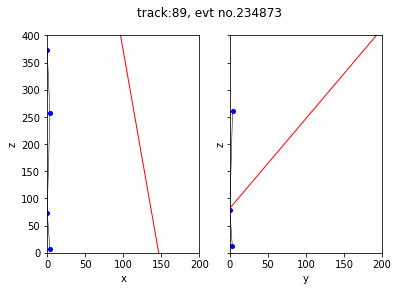

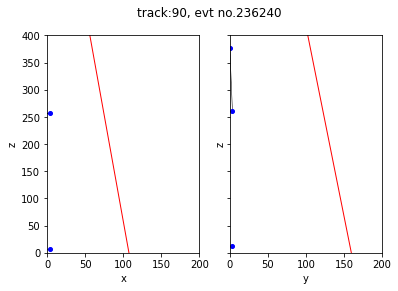

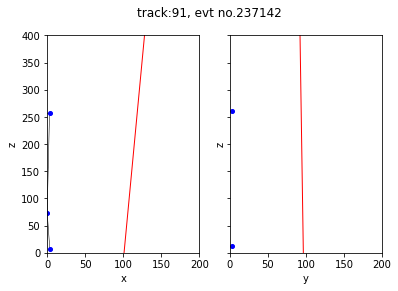

In [70]:
for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(1,2, sharey=True)
    plt.suptitle('track:{}, evt no.{}'.format(j+1, int(evt)))
    ax[1].plot(hits_from_test[np.where(evt_id==evt)[0]][0][:4], zs[:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].plot(hits_from_test[np.where(evt_id==evt)[0]][0][4:], zs[4:], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].plot(fitparamsx[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsx[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1].plot(fitparamsy[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsy[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[0].set_xlabel('x')
    ax[1].set_xlabel('y')
    for i in [0,1]:
        ax[i].set_xlim(0,200)
        ax[i].set_ylim(0,400)
        ax[i].set_ylabel('z')
    plt.show()

##### Upper and lower track fit params

In [18]:
fitparamsxU = [rnp.root2array(test_file, treename='T', branches='xUfitpar{}'.format(i)) for i in [0,1]]
fitparamsxU = np.vstack(fitparamsxU).transpose()
fitparamsyU = [rnp.root2array(test_file, treename='T', branches='yUfitpar{}'.format(i)) for i in [0,1]]
fitparamsyU = np.vstack(fitparamsyU).transpose()

fitparamsxL = [rnp.root2array(test_file, treename='T', branches='xLfitpar{}'.format(i)) for i in [0,1]]
fitparamsxL = np.vstack(fitparamsxL).transpose()
fitparamsyL = [rnp.root2array(test_file, treename='T', branches='yLfitpar{}'.format(i)) for i in [0,1]]
fitparamsyL = np.vstack(fitparamsyL).transpose()

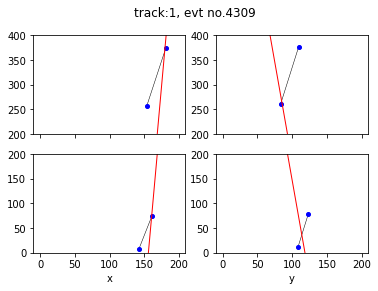

In [19]:
for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(2,2, sharex = True)
    plt.suptitle('track:{}, evt no.{}'.format(j+1, int(evt)))
    
    ax[0, 0].plot(ghits[int(evt)][4:6], zs[4:6], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0, 0].plot(fitparamsxU[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsxU[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)

    ax[1, 0].plot(ghits[int(evt)][6:8], zs[6:8], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[1, 0].plot(fitparamsxL[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsxL[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    
    ax[0, 1].plot(ghits[int(evt)][:2], zs[:2], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0, 1].plot(fitparamsyU[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsyU[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)

    ax[1, 1].plot(ghits[int(evt)][2:4], zs[2:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[1, 1].plot(fitparamsyL[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsyL[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    
    ax[1,0].set_xlabel('x')
    ax[1,1].set_xlabel('y')
    
    ax[1,1].set_ylim(0, 200)
    ax[0,1].set_ylim(200, 400)
    ax[1,0].set_ylim(0,200)
    ax[0,0].set_ylim(200,400)
    plt.show()
    break

In [20]:
evt

4309.0

In [21]:
fitparamsxU[np.where(evt_id==evt)[0]]

array([[-2440.5270638 ,    15.67258436]])

In [22]:
fitparamsxL[np.where(evt_id==evt)[0]]

array([[-2440.5270638 ,    15.67258436]])

In [23]:
fitparamsyU[np.where(evt_id==evt)[0]]

array([[941.78992574,  -7.96130733]])

In [24]:
fitparamsyL[np.where(evt_id==evt)[0]]

array([[941.78992574,  -7.96130733]])

In [25]:
def twopt_line(x, x1, x2, y1, y2):
    return x*((y2-y1)/(x2-x1))-x1*((y2-y1)/(x2-x1)) + y1

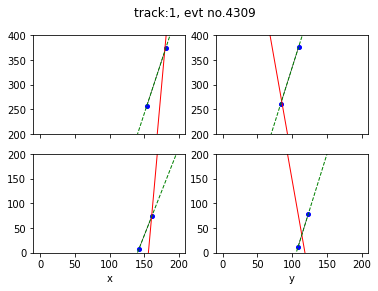

In [26]:
for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(2,2, sharex = True)
    plt.suptitle('track:{}, evt no.{}'.format(j+1, int(evt)))
    
    ax[0, 0].plot(ghits[int(evt)][4:6], zs[4:6], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0, 0].plot(fitparamsxU[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsxU[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[0, 0].plot(twopt_line(xx, *ghits[int(evt)][4:6], *zs[4:6]), '--',c='green', linewidth=1)

    ax[1, 0].plot(ghits[int(evt)][6:8], zs[6:8], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[1, 0].plot(fitparamsxL[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsxL[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1, 0].plot(twopt_line(xx, *ghits[int(evt)][6:8], *zs[6:8]), '--',c='green', linewidth=1)

    ax[0, 1].plot(ghits[int(evt)][:2], zs[:2], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0, 1].plot(fitparamsyU[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsyU[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[0, 1].plot(twopt_line(xx, *ghits[int(evt)][:2], *zs[:2]), '--', c='green', linewidth=1)

    ax[1, 1].plot(ghits[int(evt)][2:4], zs[2:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[1, 1].plot(fitparamsyL[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsyL[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1, 1].plot(twopt_line(xx, *ghits[int(evt)][2:4], *zs[2:4]), '--', c='green', linewidth=1)
    
    ax[1,0].set_xlabel('x')
    ax[1,1].set_xlabel('y')
    
    ax[1,1].set_ylim(0, 200)
    ax[0,1].set_ylim(200, 400)
    ax[1,0].set_ylim(0,200)
    ax[0,0].set_ylim(200,400)
    plt.show()
    break

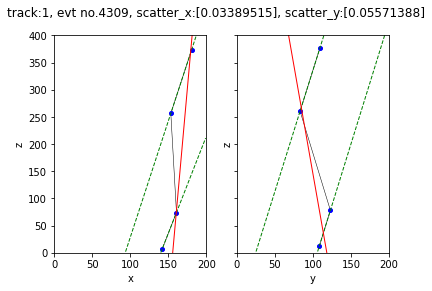

In [27]:
 for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(1,2, sharey=True)
    plt.suptitle('track:{}, evt no.{}, scatter_x:{}, scatter_y:{}'.format(j+1, int(evt), 
                                                                          scatteranglex[np.where(evt_id==evt)[0]], 
                                                                          scatterangley[np.where(evt_id==evt)[0]]))
    ax[1].plot(ghits[int(evt)][:4], zs[:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[1].plot(twopt_line(xx, *ghits[int(evt)][:2], *zs[:2]), '--',c='green', linewidth=1)
    ax[1].plot(twopt_line(xx, *ghits[int(evt)][2:4], *zs[2:4]), '--',c='green', linewidth=1)

    ax[0].plot(ghits[int(evt)][4:], zs[4:], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].plot(twopt_line(xx, *ghits[int(evt)][4:6], *zs[4:6]), '--',c='green', linewidth=1)
    ax[0].plot(twopt_line(xx, *ghits[int(evt)][6:8], *zs[6:8]), '--',c='green', linewidth=1)

    ax[0].plot(fitparamsx[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsx[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1].plot(fitparamsy[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsy[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[0].set_xlabel('x')
    ax[1].set_xlabel('y')
    for i in [0,1]:
        ax[i].set_xlim(0,200)
        ax[i].set_ylim(0,400)
        ax[i].set_ylabel('z')
    plt.show()
    break

In [28]:
ghits[222128]

array([109.64375,  79.94375, 106.1    , 188.8625 ,  82.64375, 154.94375,
       122.13125, 143.13125])

In [29]:
vx = rnp.root2array(test_file, treename='T', branches='vx')
vx = np.vstack(vx).transpose()
vy = rnp.root2array(test_file, treename='T', branches='vy')
vy = np.vstack(vy).transpose()

In [51]:
px = [rnp.root2array(test_file, treename='T', branches='px{}'.format(i)) for i in [1,2]]
px = np.vstack(px).transpose()
py = [rnp.root2array(test_file, treename='T', branches='py{}'.format(i)) for i in [1,2]]
py = np.vstack(py).transpose()

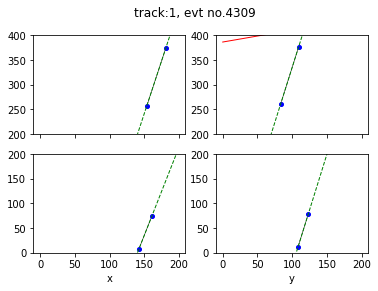

In [68]:
for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(2,2, sharex = True)
    plt.suptitle('track:{}, evt no.{}'.format(j+1, int(evt)))
    
    ax[0, 0].plot(ghits[int(evt)][4:6], zs[4:6], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0, 0].plot(vx[0][np.where(evt_id==evt)[0]][0] + xx*px[np.where(evt_id==evt)[0]][0][0], c='red', linewidth=1)
    ax[0, 0].plot(twopt_line(xx, *ghits[int(evt)][4:6], *zs[4:6]), '--',c='green', linewidth=1)

    ax[1, 0].plot(ghits[int(evt)][6:8], zs[6:8], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[1, 0].plot(vx[0][np.where(evt_id==evt)[0]][0]+ xx*px[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1, 0].plot(twopt_line(xx, *ghits[int(evt)][6:8], *zs[6:8]), '--',c='green', linewidth=1)

    ax[0, 1].plot(ghits[int(evt)][:2], zs[:2], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0, 1].plot(vy[0][np.where(evt_id==evt)[0]][0] + xx*py[np.where(evt_id==evt)[0]][0][0], c='red', linewidth=1)
    ax[0, 1].plot(twopt_line(xx, *ghits[int(evt)][:2], *zs[:2]), '--', c='green', linewidth=1)

    ax[1, 1].plot(ghits[int(evt)][2:4], zs[2:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[1, 1].plot(vy[0][np.where(evt_id==evt)[0]][0] + xx*py[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1, 1].plot(twopt_line(xx, *ghits[int(evt)][2:4], *zs[2:4]), '--', c='green', linewidth=1)
    
    ax[1,0].set_xlabel('x')
    ax[1,1].set_xlabel('y')
    
    ax[1,1].set_ylim(0, 200)
    ax[0,1].set_ylim(200, 400)
    ax[1,0].set_ylim(0,200)
    ax[0,0].set_ylim(200,400)
    plt.show()
    break

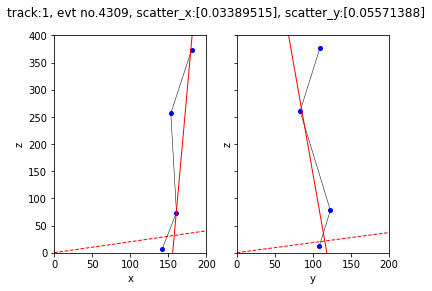

In [70]:
 for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(1,2, sharey=True)
    plt.suptitle('track:{}, evt no.{}, scatter_x:{}, scatter_y:{}'.format(j+1, int(evt), 
                                                                          scatteranglex[np.where(evt_id==evt)[0]], 
                                                                          scatterangley[np.where(evt_id==evt)[0]]))
    ax[1].plot(ghits[int(evt)][:4], zs[:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    #ax[1].plot(twopt_line(xx, *ghits[int(evt)][:2], *zs[:2]), '--',c='green', linewidth=1)
    #ax[1].plot(twopt_line(xx, *ghits[int(evt)][2:4], *zs[2:4]), '--',c='green', linewidth=1)

    ax[0].plot(ghits[int(evt)][4:], zs[4:], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    #ax[0].plot(twopt_line(xx, *ghits[int(evt)][4:6], *zs[4:6]), '--',c='green', linewidth=1)
    #ax[0].plot(twopt_line(xx, *ghits[int(evt)][6:8], *zs[6:8]), '--',c='green', linewidth=1)

    ax[0].plot(fitparamsx[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsx[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[1].plot(fitparamsy[np.where(evt_id==evt)[0]][0][0] + xx*fitparamsy[np.where(evt_id==evt)[0]][0][1], c='red', linewidth=1)
    ax[0].plot(px[np.where(evt_id==evt)[0]][0][0] + xx*px[np.where(evt_id==evt)[0]][0][1], '--',c='red', linewidth=1)
    ax[1].plot(py[np.where(evt_id==evt)[0]][0][0] + xx*py[np.where(evt_id==evt)[0]][0][1], '--',c='red', linewidth=1)
    ax[0].set_xlabel('x')
    ax[1].set_xlabel('y')
    for i in [0,1]:
        ax[i].set_xlim(0,200)
        ax[i].set_ylim(0,400)
        ax[i].set_ylabel('z')
    plt.show()
    break

In [37]:
poca_vx = rnp.root2array(test_file, treename='T', branches='pocascattering.vx')
poca_vy = rnp.root2array(test_file, treename='T', branches='pocascattering.vy')
poca_vz = rnp.root2array(test_file, treename='T', branches='pocascattering.vz')

In [42]:
poca_vx[np.where(evt_id==evt)[0]]

array([2.15992358e-314])

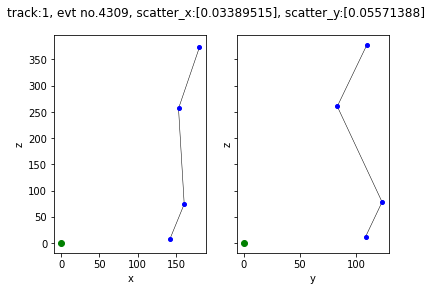

In [47]:
 for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(1,2, sharey=True)
    plt.suptitle('track:{}, evt no.{}, scatter_x:{}, scatter_y:{}'.format(j+1, int(evt), 
                                                                          scatteranglex[np.where(evt_id==evt)[0]], 
                                                                          scatterangley[np.where(evt_id==evt)[0]]))
    ax[1].plot(ghits[int(evt)][:4], zs[:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].plot(ghits[int(evt)][4:], zs[4:], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].scatter(poca_vx[np.where(evt_id==evt)[0]][0], poca_vz[np.where(evt_id==evt)[0]][0], 
                  c='green')
    ax[1].scatter(poca_vy[np.where(evt_id==evt)[0]][0], poca_vz[np.where(evt_id==evt)[0]][0], 
                  c='green')
    ax[0].set_xlabel('x')
    ax[1].set_xlabel('y')
    for i in [0,1]:
        #ax[i].set_xlim(0,200)
        #ax[i].set_ylim(0,400)
        ax[i].set_ylabel('z')
    plt.show()
    break

In [50]:
fitvx = rnp.root2array(test_file, treename='T', branches='fitscattering.vx')
fitvy = rnp.root2array(test_file, treename='T', branches='fitscattering.vy')
fitvz = rnp.root2array(test_file, treename='T', branches='fitscattering.vz')


fitvx[np.where(evt_id==evt)[0]]


array([448.69202444])

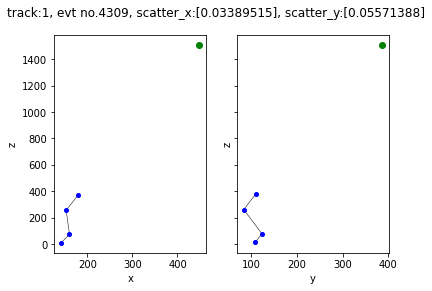

In [51]:
 for j, evt in enumerate(evt_id):
    fig, ax = plt.subplots(1,2, sharey=True)
    plt.suptitle('track:{}, evt no.{}, scatter_x:{}, scatter_y:{}'.format(j+1, int(evt), 
                                                                          scatteranglex[np.where(evt_id==evt)[0]], 
                                                                          scatterangley[np.where(evt_id==evt)[0]]))
    ax[1].plot(ghits[int(evt)][:4], zs[:4], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].plot(ghits[int(evt)][4:], zs[4:], 'o-', markerfacecolor='blue', markeredgecolor='blue', markersize=4, c='k', linewidth=.5)
    ax[0].scatter(fitvx[np.where(evt_id==evt)[0]][0], fitvz[np.where(evt_id==evt)[0]][0], 
                  c='green')
    ax[1].scatter(fitvy[np.where(evt_id==evt)[0]][0], fitvz[np.where(evt_id==evt)[0]][0], 
                  c='green')
    ax[0].set_xlabel('x')
    ax[1].set_xlabel('y')
    for i in [0,1]:
        #ax[i].set_xlim(0,200)
        #ax[i].set_ylim(0,400)
        ax[i].set_ylabel('z')
    plt.show()
    break

In [52]:
fitvx

array([ 4.48692024e+02,  1.68203513e+02,  4.42402273e+03, -7.19763698e+03,
        1.11917594e+04,  6.53863474e+02,  8.24204425e+02,  2.93332652e+02,
       -1.82310124e+03,  1.97269139e+03,  2.84898228e+02,  1.03005200e+03,
        1.44249550e+02, -9.05435124e+02, -6.95855037e+02,  2.67143383e+02,
       -7.34135343e+02, -9.20720620e+02,  1.45333136e+02,  4.30288022e+03,
       -1.35872124e+03,  9.34108421e+01,  1.37009165e+02,  1.82481712e+02,
        4.74155486e+03,  5.11640188e+02,  1.69385850e+02,  6.36585825e+02,
        3.06430065e+02,  3.02210205e+03,  1.09411678e+04,  2.46701385e+01,
        4.39407064e+02,  3.51579375e+02,  1.06805517e+03,  1.58494042e+02,
        1.41064154e+02, -7.79471179e+02,  1.13294876e+03,  1.11673369e+04,
        1.46989660e+03, -1.43540566e+03,  2.05158831e+02,  3.16206893e+02,
       -5.35072826e+02,  2.60082355e+02,  3.93177631e+02,  1.39210423e+02,
        1.96230210e+02,  1.11157441e+02,  5.63032928e+02,  1.96860659e+02,
       -1.85698028e+03,  